In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)
<ipython-input-3-d6221de3a953>:18: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
<ipython-input-3-d6221de3a953>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   float64
 1   Time                   float64
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(9)
memory usage: 158.3 MB
None

Basic Statistics:
       Date  Time  Global_active_power  Global_reactive_power       Voltage  \
count   0.0   0.0         2.075259e+06           2.075259e+06  2.075259e+06   
mean    NaN   NaN         1.086168e+00           1.233280e-01  2.408416e+02   
std     NaN   NaN         1.053172e+00           1.125144e-01  3.235574e+00   
min     NaN   NaN         7.600000e-02           0.000000e+00 

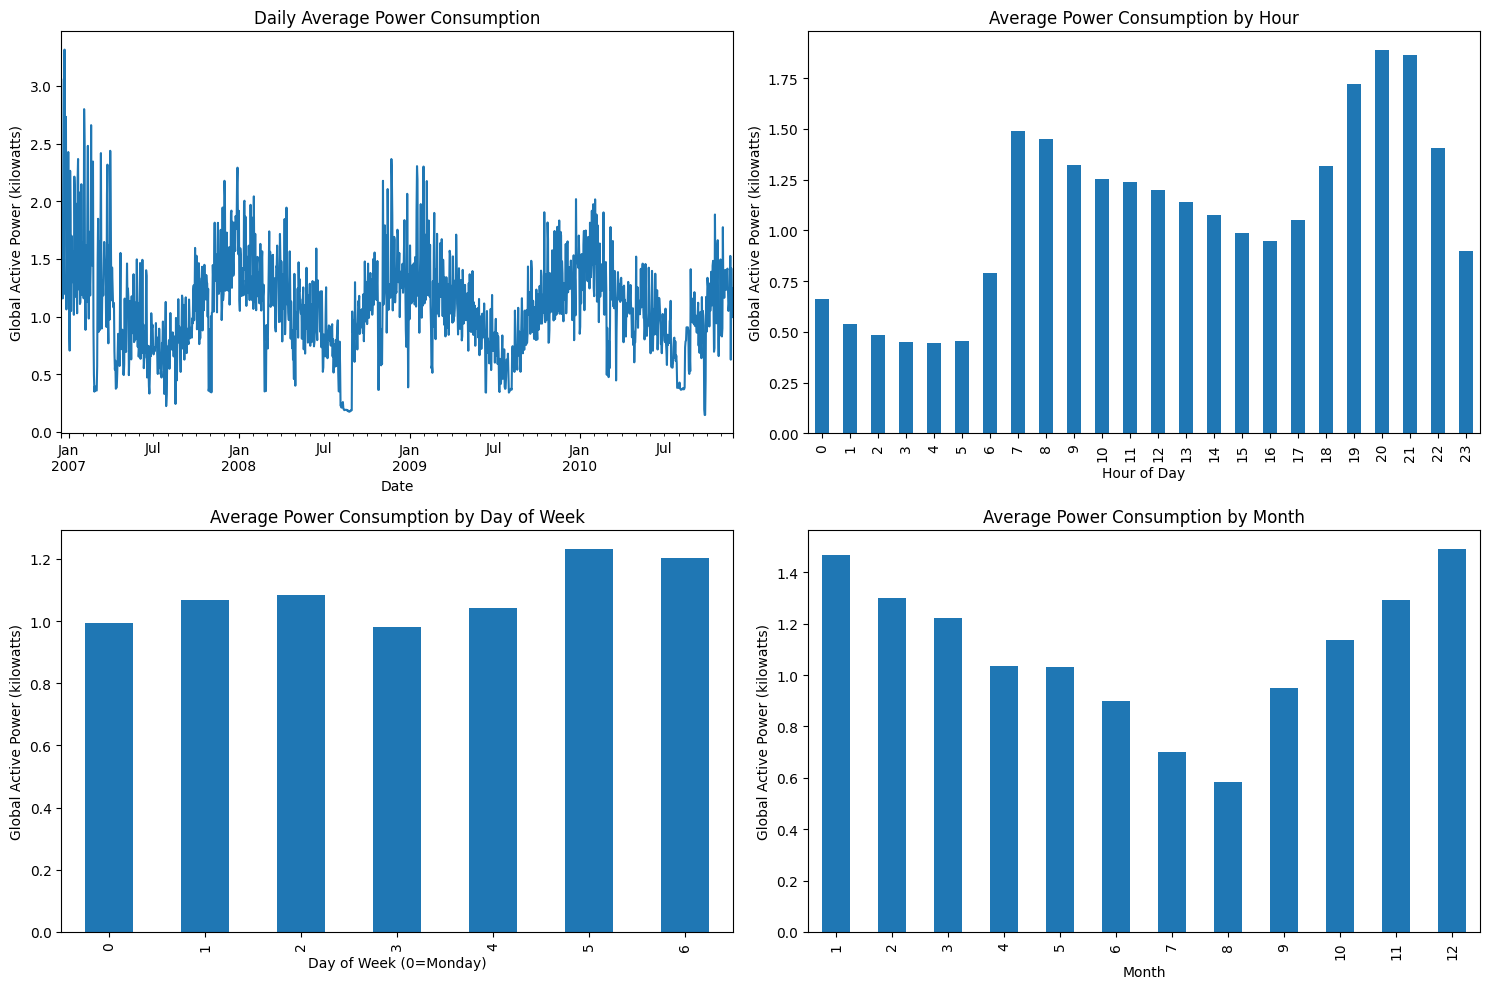

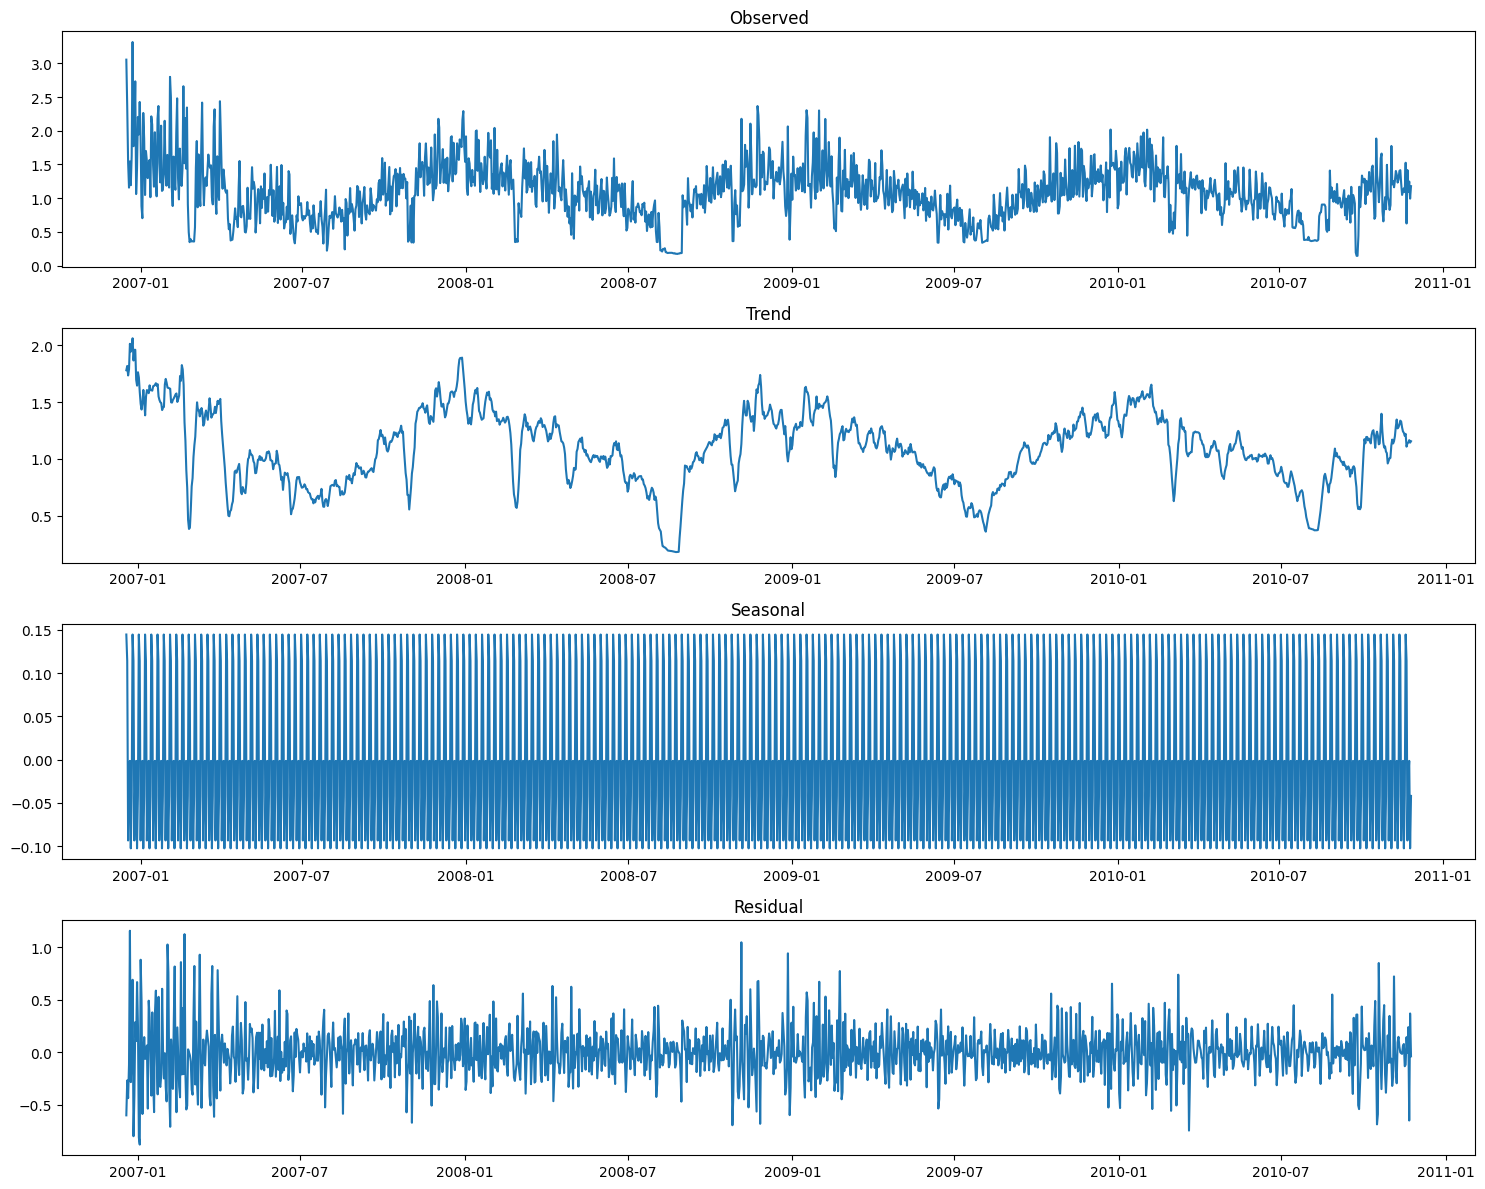

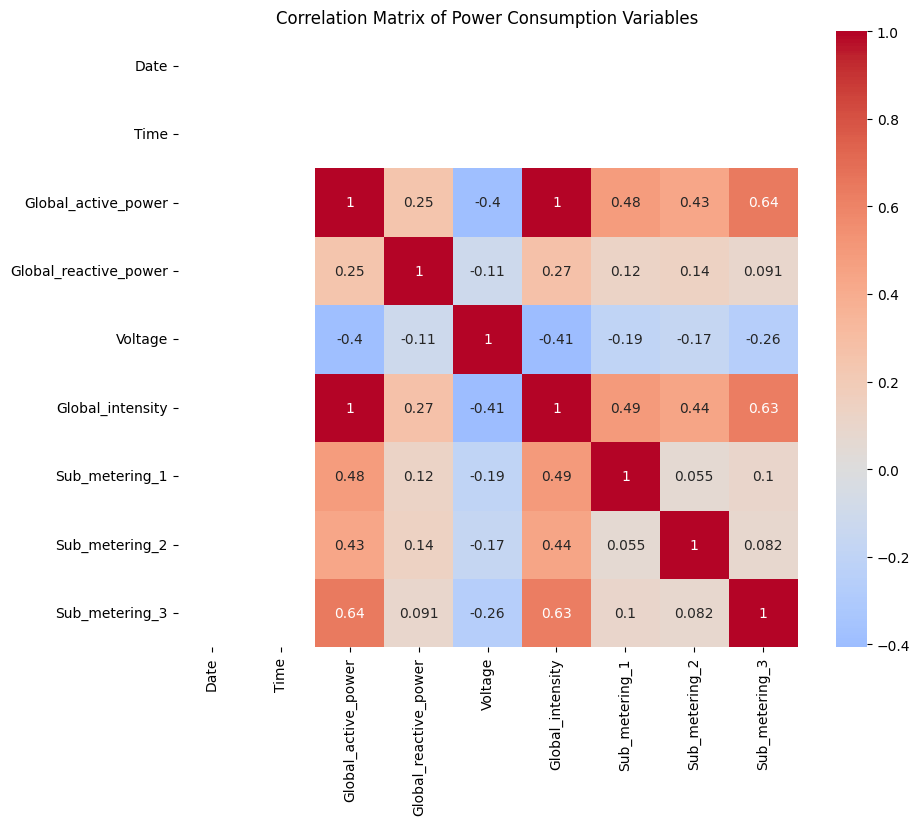


Key Findings:
Average daily power consumption: 1.09 kilowatts
Peak power consumption: 11.12 kilowatts
Most active hour: 20
Most active day of week: 5
Most active month: 12


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from ucimlrepo import fetch_ucirepo
from datetime import datetime

# Fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# Combine features and targets
df = pd.concat([X, y], axis=1)

# Convert Date and Time columns to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Basic data cleaning
df.replace('?', np.nan, inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.fillna(method='ffill', inplace=True)

# Basic statistics and information
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Daily Power Consumption
plt.subplot(2, 2, 1)
df['Global_active_power'].resample('D').mean().plot()
plt.title('Daily Average Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')

# 2. Hourly Pattern
plt.subplot(2, 2, 2)
hourly_avg = df['Global_active_power'].groupby(df.index.hour).mean()
hourly_avg.plot(kind='bar')
plt.title('Average Power Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kilowatts)')

# 3. Weekly Pattern
plt.subplot(2, 2, 3)
weekly_avg = df['Global_active_power'].groupby(df.index.dayofweek).mean()
weekly_avg.plot(kind='bar')
plt.title('Average Power Consumption by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Global Active Power (kilowatts)')

# 4. Monthly Pattern
plt.subplot(2, 2, 4)
monthly_avg = df['Global_active_power'].groupby(df.index.month).mean()
monthly_avg.plot(kind='bar')
plt.title('Average Power Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')

plt.tight_layout()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(df['Global_active_power'].resample('D').mean(),
                                 period=7)

plt.figure(figsize=(15, 12))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Power Consumption Variables')
plt.show()

# Print key findings
print("\nKey Findings:")
print(f"Average daily power consumption: {df['Global_active_power'].mean():.2f} kilowatts")
print(f"Peak power consumption: {df['Global_active_power'].max():.2f} kilowatts")
print(f"Most active hour: {hourly_avg.idxmax()}")
print(f"Most active day of week: {weekly_avg.idxmax()}")
print(f"Most active month: {monthly_avg.idxmax()}")